## 6.1 선형 가우시안 모델

선형 가우시안 상태 공간 모델 또는 동적 선형 모델(Dynamic Linear Model, DLM)은 1 order p 차원 벡터의 자기회기를 상태 방정식으로 구성합니다.

$$x_t=\Phi x_{t-1}+w_t\tag{6.1}$$

$w_t$는 $p\times1$의 IID이고 평균이 0인 정규분포를 따르며 공분산 행렬은 $Q$입니다. 즉 $w_t \sim iid N_p(0,Q)$입니다. DLM에서 과정은 $x_0 \sim N_p(\mu_0,\Sigma_0)$로 시작한다고 가정합니다.

상태벡터 $x_t$를 직접 관측하지는 않지만 잡음이 추가된 다음과 같은 선형 변환으로 표현합니다.

$$y_t=A_tx_t+v_t\tag{6.2}$$

여기서 $A_t$는 $q\times q$ 측정 또는 관측 행렬입니다. 식(6.2)는 관측식이라고 합니다. 관측된 데이터 벡터 $y_t$는 $q$차원이고 $q$는 상태벡터의 차원인 $p$보다 클수도 있고 작을수도 있습니다. 추가된 과측 잡음은 $v_t\sim iid N_q(0,R)$입니다. 편의상 $x_0$, $\{w_t\}$, $\{v_t\}$는 상호관계가 없다고(uncorrelated) 가정합니다. 이 가정은 필수적이지는 않지만 처음 개념을 설명하는데 도움이 됩니다. 상호관계 오차(correlated error)의 경우에 대해서는 6.6장에서 설명하겠습니다.

5.6장의 ARMAX 모델과 같이 외부 변수 즉 고정된 입력이 상태 또는 관측치로 들어갑니다. 이 경우 $r\times1$크기의 입력 벡터 $u_t$를 고려합니다. 이경우 모델은 다음과 같이 쓸 수 있습니다.

$$x_t=\Phi x_{t-1}+\Upsilon u_t+w_t\tag{6.3}$$

$$y_t=A_tx_t+\Gamma u_t+v_t\tag{6.4}$$

$\Upsilon$의 크기는 $p\times r$이고 $\Gamma$의 크기는 $q\times r$입니다. 이 행렬들은 0 행렬이어도 됩니다.

### 예제 6.1 A Biomedical Example

골수이식을 한 후 암 환자들의 생체 변화를 측정하는 경우를 생각해 봅시다. 그림 6.2는 Jones (1984)가 사용한 91일간 3개의 변수(log(백혈구 수)=WBC, log(혈소판 수)=PLT, 적혈구=HCT)를 측정한 데이터이며, $y_t=(y_{t1},y_{t2},y_{t3})'$로 표시하겠습니다. 약 40% 정도의 값들이 분실되었으며, 주로 35일 뒤의 값들입니다. 이 예제의 목적은 상태공간 방법을 사용해 3개의 변수를 모델링하고, 분실된 값들을 추정하는 것입니다. Jones에 의하면, 골수이식 후 약 100일 뒤의 혈소판 수는 장기 생존에 대한 좋은 척도가 된다고 합니다. 이러한 내용을 고려하여 다음과 같이 식(6.1)의 상태 방정식을 표현할 수 있습니다.

$$
\begin{pmatrix}
x_{t1} \\ x_{t2} \\ x_{t3} 
\end{pmatrix}
=
\begin{pmatrix}
\phi_{11} && \phi_{12} && \phi_{13} \\
\phi_{21} && \phi_{22} && \phi_{23} \\
\phi_{31} && \phi_{32} && \phi_{33} \\
\end{pmatrix}
\begin{pmatrix}
x_{t-1,1} \\ x_{t-1,2} \\ x_{t-1,3}
\end{pmatrix}
+
\begin{pmatrix}
x_{t1} \\ x_{t2} \\ x_{t3}
\end{pmatrix}
\tag{6.5}
$$

관측 방정식은 $y_t=A_tx_t+v_t$로 표현할 수 있으며 $3\times3$ 행렬인 $A_t$는 그날에 혈액을 체취 했는지 여부에 따라 단위행렬 또는 0행렬일 수 있습니다. 공분산 행렬 $R$과 $Q$는 각각 $3\times3$ 행렬입니다. 그림 6.2와 유사한 그래프는 다음과 같이 만들 수 있습니다.

Loading required package: astsa


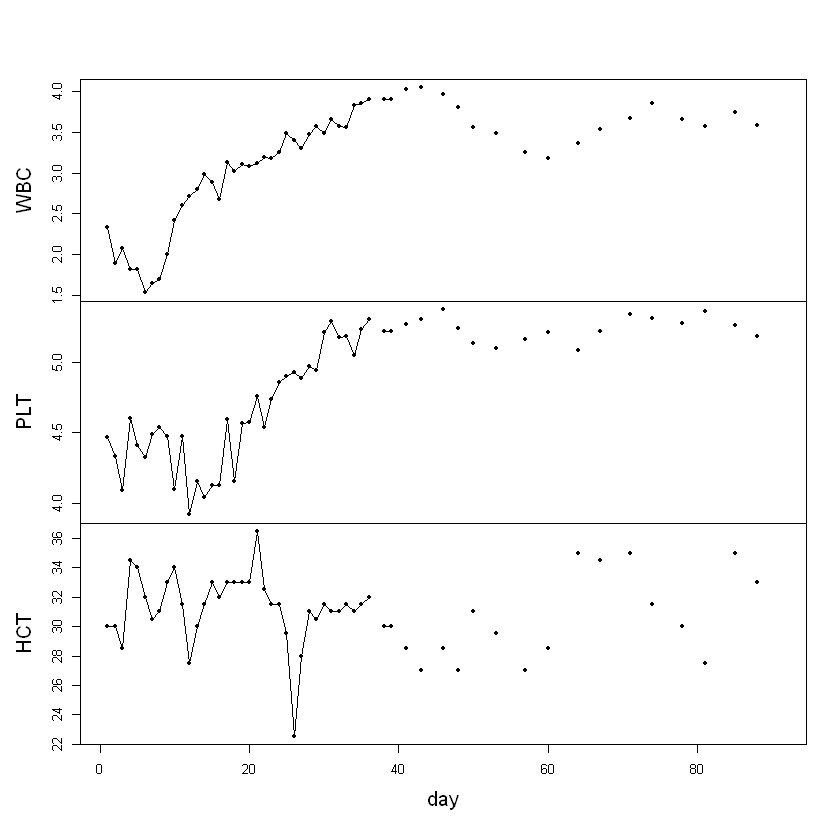

In [1]:
options(warn=-1) # Warning Message 숨기기
require(astsa)   # astsa package laoding
plot(blood, type='o', pch=19, xlab='day',main='')

모델은 단순해 보이지만 꽤 다양한 분야에 적용 가능합니다. 예를들어 상태 과정이 2차 벡터 자기회기 모델(Vector Autoregressive mode) 즉 VAR(2)이면 다음과 같이 2p 차원의 과정으로 상태 방정식을 쓸 수 있습니다.

$$
\underset{2p\times1}{
\begin{pmatrix}
x_t \\ x_{t-1}
\end{pmatrix}
}
=
\underset{2p\times2p}{
\begin{pmatrix}
\Phi_1 && \Phi_2 \\
I      && 0 
\end{pmatrix}
}
\underset{2p\times1}{
\begin{pmatrix}
x_{t-1} \\ x_{t-2}
\end{pmatrix}
}
+
\underset{2p\times1}{
\begin{pmatrix}
w_t \\ 0
\end{pmatrix}
}
\\
\tag{6.6}
$$

그리고 관측 방정식은 $q$차원으로 다음과 같이 쓸 수 있습니다.

$$
\underset{q\times1}{y_t}=
\underset{q\times2p}{
\begin{bmatrix}
A_t|0
\end{bmatrix}
}
\underset{2p\times1}{
\begin{pmatrix}
x_t \\ x_{t-1}
\end{pmatrix}
}
+
\underset{q\times1}{
v_t
}
\tag{6.7}$$

위의 단순한 예로는 상태공간 식의 진짜 장점을 알 수 없습니다. 다양한 형태의 행렬 $A_t$와 행렬 $\Phi$로 정의되는 전이행렬로 특수한 형태를 갖추면 다변수 시간이력을 적은 수의 변수로 단순하게 fitting 할 수 있습니다. 본 장에서는 다양한 예제들을 다룰 것입니다. 6.5장의 구조 모델은 모델 유연성의 좋은 예시 입니다. 설명을 위한 단순한 예제를 아래에서 다룹니다.

### 예제 6.2 지구온난화

그림 6.3은 1880년부터 2015년까지 지구 온도에 대한 2개의 추정 결과입니다. 하나는 <font color='blue'>globtemp</font>이고 1장에서 다루었으며, 세계 지반-해양 평균 온도 입니다. 다른 하나는 <font color='blue'>globtempl</font>이며 지표면의 공기 온도입니다. 개념 상 두개의 데이터는 동일한 기후 조건에서 측정되어야 하며 그 기후조건을 추정하는 문제를 고려해 보겠습니다. 그림을 그리는 R 코드는 다음과 같습니다.

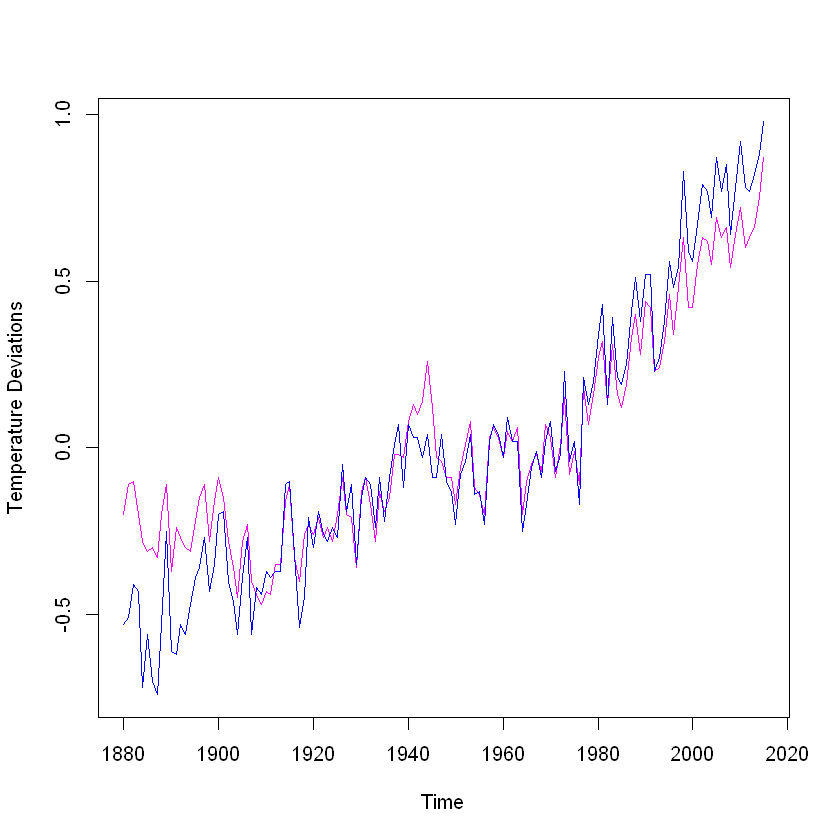

In [3]:
ts.plot(globtemp, globtempl, col=c(6,4), ylab='Temperature Deviations')

2개의 데이터는 같은 신호를 다른 잡음과 함께 측정되었다고 생각해 봅시다.

$$y_{t1}=x_t+v_{t1}\;\;\;\;y_{t2}=x_t+v_{t2}$$

위의 식은 다음과 같이 쓸 수 있습니다.

$$
\begin{pmatrix}
y_{t1} \\ y_{t2}
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 1
\end{pmatrix}
x_t+
\begin{pmatrix}
v_{t1} \\ v_{t2}
\end{pmatrix}
\tag{6.8}
$$

$$R=var\begin{pmatrix}v_{t1}\\v_{t2}\end{pmatrix}=\begin{pmatrix} r_{11}&&r_{12}\\r_{21}&&r_{22}\end{pmatrix}$$

$x_t$는 drift가 있는 random walk로 모델링 할 수 있습니다.

$$x_t=\delta+x_{t-1}+w_t\tag{6.9}$$

$$Q=var(w_t)$$

이 예제를 식(6.3), (6.4)에 적용하면, $p=1, q=2, \Phi=1, \Upsilon=\delta, u_t=1$입니다.

사회과학 또는 생체과학을 모델링하기 위해 상태공간 접근법을 사용하기 위해서는 모델 식별 및 변수 추정 과정이 필요합니다. 왜냐하면 이러한 분야에서는 잘 정의된 미분방정식이 잘 없기 때문입니다. 동적선형모델 (6.3), (6.4)에서 일반적인 문제는 $\Phi, \Upsilon, Q, \Gamma, A_t, R$에 포함된 변수들을 추정하여 관측되지 않은 과정 $x_t$를 추정 또는 예측하는 것입니다. 상태공간 식의 장점은 (6.3)과 (6.4)를 사용해 손실된 대양한 데이터를 다루고 신뢰구간을 형성할 수 있다는 것입니다. 관측행렬 $A_t$와 설계행렬 사이의 관계를 유추하고 분산 설정에 대한 해석을 하는 것은 유용한 방법입니다. 관측행렬 $A_t$와 전이행렬 $\Phi$를 적절히 선택하면 상수 또는 시간에 따라 변하는 모델을 구축할 수 있습니다.

일반적인 모델에 대하여 알아보기 전, 잡음이 포함된 계측기로 관측한 AR(1) 과정인 단변수 상태공간 모델을 통해 설명을 하고자 합니다.

### 예제 6.3 관측 잡음이 있는 AR(1) 과정

관측 잡음이 있는 단변수 상태공간 모델을 고려해 봅시다.

$$y_t=x_t+v_t\tag{6.10}$$

신호(상태)는 AR(1) 과정입니다.

$$x_t=\phi x_{t-1}+w_t\tag{6.11}$$

여기서 $v_t \sim iid N(0,\sigma_v^2)$, $w_t \sim iid N(0,\sigma_w^2)$, $x_0 \sim N(0,\frac{\sigma_w^2}{1-\phi^2})$이고 이 셋은 독립입니다.

상태 $x_t$는 stationary AR(1) 과정이기 때문에 3장에서 상태 $x_t$에 태한 특성을 알아보았습니다. (문제 3.2 참고). 예를들어, $x_t$의 자기공분산함수는 다음과 같습니다.

$$\gamma_x(h)=\frac{\sigma_w^2}{1-\phi^2}\phi^h,\;\;\;\;h=0,1,2,\dots\tag{6.12}$$

하지만 여기서 우리는 관측잡음의 추가가 어떤 영향을 미치는지 알아보아야 합니다. 필수적인 가정은 아니지만 이 예제에서 $x_t$는 staionary라고 가정하겠습니다. 이 경우, 관측 또한 stationary입니다. 왜냐하면 $y_t$는 두개의 독립적인 staionary 성분 $x_t$와 $v_t$의 합이기 때문입니다. 따라서 다음과 같이 표현 가능합니다.

$$\gamma_y(0)=var(y_t)=var(x_t+v_t)=\frac{\sigma_w^2}{1-\phi^2}+\sigma_v^2\tag{6.13}$$

그리고 $h\geq1$이면,

$$\gamma_y(h)=cov(y_t,y_{t-h})=cov(x_t+v_t,x_{t-h}+v_{t-h})=\gamma_x(h)\tag{6.14}$$

따라서 $h\geq1$이면, 관측치의 ACF는 다음과 같습니다.

$$\rho_y(h)=\frac{\gamma_y(h)}{\gamma_y(0)}=\left(1+\frac{\sigma_v^2}{\sigma_w^2}(1-\phi^2)\right)^{-1}\phi^h\tag{6.15}$$

식(6.15)의 형태를 통해 관측값 $y_t$는 $\sigma_v^2=0$이 아니면 AR(1)이 아님을 알 수 있습니다. 또한 $y_t$의 자기상관 구조는 예제 3.14의 ARMA(1,1) 과정의 자기상관 구조와 동일합니다. 따라서 관측치는 다음과 같이 ARMA(1,1) 형태로 표현할 수 있습니다.

$$y_t=\phi y_{t-1}+\theta u_{t-1}+u_t$$

여기서 $u_t$는 분산이 $\sigma_u^2$인 가우시안 백색소음이고, $\theta$와 $\sigma_u^2$은 적절히 선택 가능합니다. 이 문제에 대해서는 6.6장과 문제 6.11에서 다루도록 하겠습니다.

stationary ARMA 모델과 stationary 상태공간 모델에는 공통점이 있지만 (6.6장 참조), 한가지 형태로 다루는 것이 때로는 편리합니다. 앞서 언급했듯이, 손실된 데이터가 있는 경우, 복잡한 다변수 시스템인 경우, 혼합된 효과가 있는 경우, 특정 형태의 nonstationarity가 있는 경우 상태공간 모델을 사용하는 것이 더 편리합니다.